# Scipy: High-level scientific computing

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

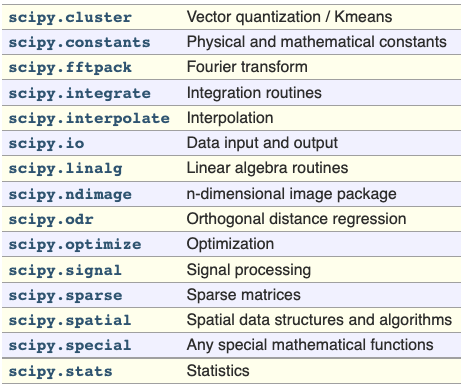

They all depends on `numpy`, but are mostly independent of each other.

## Mathematical physics: `scipy.special`

scipy.special package contains numerous functions of mathematical physics. It can deal with logarithmic and exponential, permutations an combinations, parabolic and exponential problems. It has functions for cube roots, lambert, beta, gamma and Bessel. All these functions follow the broadcasting and array looping regulations. 


In [6]:
from scipy import special

### Factorial

In [7]:
special.factorial(4)

24.0

### Permutations and combinations

Permutations of N things taken k at a time

In [11]:
# perm(N, k)
special.perm(6, 2)

30.0

Similarly we can find the number of combinations

In [12]:
special.comb(6, 2, repetition=True)

21.0

### Bessel Function

Bessel functions appear in wave propagation, signal processing, and static problems. Find the Bessel function of the first kind with:

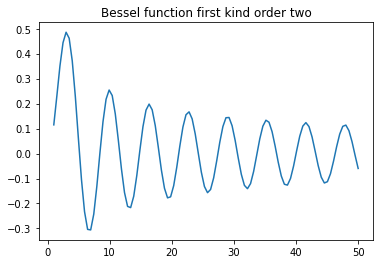

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 50, 100)
# Bessel function of the first kind order 2
jn1 = special.jn(2, x)

plt.plot(x, jn1)
plt.title('Bessel function first kind order two');

### Other scipy.special Functions

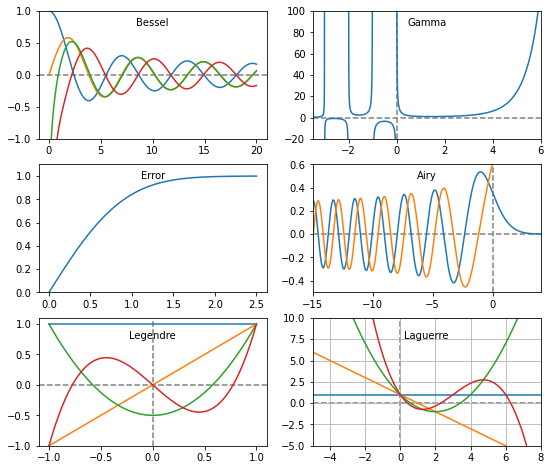

In [20]:
# create a figure window
fig = plt.figure(1, figsize=(9,8))

# create arrays for a few Bessel functions and plot them
x = np.linspace(0, 20, 256)
j0 = special.jn(0, x)
j1 = special.jn(1, x)
y0 = special.yn(0, x)
y1 = special.yn(1, x)
ax1 = fig.add_subplot(321)  # multiple plots: 3x2 , index 1
ax1.plot(x,j0, x,j1, x,y0, x,y1)
ax1.axhline(color="grey", ls="--", zorder=-1)
ax1.set_ylim(-1,1)
ax1.text(0.5, 0.95,'Bessel', ha='center', va='top',
     transform = ax1.transAxes)

# gamma function
x = np.linspace(-3.5, 6., 3601)
g = special.gamma(x)
g = np.ma.masked_outside(g, -100, 400)
ax2 = fig.add_subplot(322)  # multiple plots: 3x2 , index 2

ax2.plot(x,g)
ax2.set_xlim(-3.5, 6)
ax2.axhline(color="grey", ls="--", zorder=-1)
ax2.axvline(color="grey", ls="--", zorder=-1)
ax2.set_ylim(-20, 100)
ax2.text(0.5, 0.95,'Gamma', ha='center', va='top',
     transform = ax2.transAxes)

# error function
x = np.linspace(0, 2.5, 256)
ef = special.erf(x)
ax3 = fig.add_subplot(323)
ax3.plot(x,ef)
ax3.set_ylim(0,1.1)
ax3.text(0.5, 0.95,'Error', ha='center', va='top',
     transform = ax3.transAxes)

# Airy function
x = np.linspace(-15, 4, 256)
ai, aip, bi, bip = special.airy(x)
ax4 = fig.add_subplot(324)
ax4.plot(x,ai, x,bi)
ax4.axhline(color="grey", ls="--", zorder=-1)
ax4.axvline(color="grey", ls="--", zorder=-1)
ax4.set_xlim(-15,4)
ax4.set_ylim(-0.5,0.6)
ax4.text(0.5, 0.95,'Airy', ha='center', va='top',
     transform = ax4.transAxes)

# Legendre polynomials
x = np.linspace(-1, 1, 256)
lp0 = np.polyval(special.legendre(0),x)
lp1 = np.polyval(special.legendre(1),x)
lp2 = np.polyval(special.legendre(2),x)
lp3 = np.polyval(special.legendre(3),x)
ax5 = fig.add_subplot(325)
ax5.plot(x,lp0, x,lp1, x,lp2, x,lp3)
ax5.axhline(color="grey", ls="--", zorder=-1)
ax5.axvline(color="grey", ls="--", zorder=-1)
ax5.set_ylim(-1,1.1)
ax5.text(0.5, 0.9,'Legendre', ha='center', va='top',
     transform = ax5.transAxes)

# Laguerre polynomials
x = np.linspace(-5, 8, 256)
lg0 = np.polyval(special.laguerre(0),x)
lg1 = np.polyval(special.laguerre(1),x)
lg2 = np.polyval(special.laguerre(2),x)
lg3 = np.polyval(special.laguerre(3),x)
ax6 = fig.add_subplot(326)
ax6.plot(x,lg0, x,lg1, x,lg2, x,lg3)
ax6.axhline(color="grey", ls="--", zorder=-1)
ax6.axvline(color="grey", ls="--", zorder=-1)
ax6.set_xlim(-5,8)
ax6.set_ylim(-5,10)
ax6.text(0.5, 0.9,'Laguerre', ha='center', va='top',
     transform = ax6.transAxes)
plt.grid(True);

The `scipy.special` module comes with a lot of functions. Here is the complete list:

In [101]:
# Remove the hash character in the next line to see the full list
# np.info(special, maxwidth=100)

## Linear algebra operations: `scipy.linalg`

The `scipy.linalg` module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).  

* The `scipy.linalg.det()` function computes the determinant of a square matrix:

In [21]:
from scipy import linalg

arr = np.array([[1, 2], [3, 4]])
linalg.det(arr)

-2.0

In [22]:
arr = np.array([[3, 2], [6, 4]])
linalg.det(arr)

0.0

* The `scipy.linalg.inv()` function computes the inverse of a square matrix:

In [23]:
arr = np.array([[1, 2], [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [27]:
rr = arr @ iarr
rr

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In [28]:
np.allclose(rr, np.eye(2))

True

* More advanced operations are available, for example singular-value decomposition (SVD):

In [31]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

The resulting array spectrum is:

In [32]:
spec

array([14.88982544,  0.45294236,  0.29654967])

The original matrix can be re-composed by matrix multiplication of the outputs of `svd`:

In [33]:
sarr = np.diag(spec)
svd_mat = uarr @ sarr @ vharr
np.allclose(svd_mat, arr)

True

SVD is commonly used in statistics and signal processing. Many other standard decompositions (QR, LU, Cholesky, Schur), as well as solvers for linear systems, are available in `scipy.linalg`.

In [34]:
P, L, U = linalg.lu(arr)
L

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.5       ,  1.        ,  0.        ],
       [ 0.16666667, -0.33333333,  1.        ]])

Here is all the methods that comes with the `scipy.inalg` module:

In [110]:
# Remove the hash character in the next line to see the full list
# np.info(linalg, maxwidth=100)

## Interpolation: `scipy.interpolate`

`scipy.interpolate` is useful for fitting a function from experimental data and thus evaluating points where no measure exists. The module is based on the FITPACK Fortran subroutines.

By imagining experimental data close to a sine function:`

In [40]:
measured_time = np.linspace(0, 1, 10)
# we add some noise
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

`scipy.interpolate.interp1d` can build a linear interpolation function:

In [42]:
from scipy.interpolate import interp1d

In [43]:
linear_interp = interp1d(measured_time, measures)

Then the result can be evaluated at the time of interest

In [44]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

In [63]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

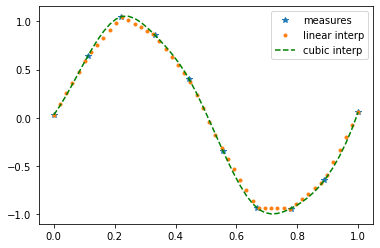

In [73]:
plt.plot(measured_time, measures, '*', label='measures')
plt.plot(interpolation_time, linear_results, '.', label='linear interp')
plt.plot(interpolation_time, cubic_results, 'g--', label='cubic interp')
plt.legend()

`scipy.interpolate.interp2d` is similar to `scipy.interpolate.interp1d`, but for 2-D arrays. Note that for the interp family, the interpolation points must stay within the range of given data points.

## Optimization and fit: `scipy.optimize`

Optimization is the problem of finding  a numerical  solution to a minimization or equality.  
The `scipy.optimize` module provides algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

### Curve fitting

Suppose we have data on a sine wave, with some noise:

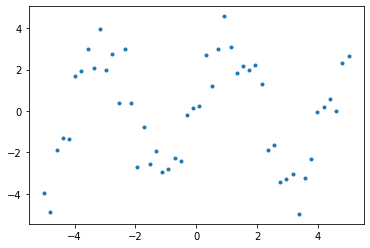

In [84]:
from scipy import optimize

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
plt.plot(x_data, y_data, '.');

If we know that the data lies on a sine wave, but not the amplitudes or the period, we can find those by least squares curve fitting. First we have to define the test function to fit, here a sine with unknown amplitude and period:

In [79]:
def test_func(x, a, b):
    return a * np.sin(b * x)

We then use `scipy.optimize.curve_fit()` to find a and b:

In [85]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[3.27177604 1.49522555]


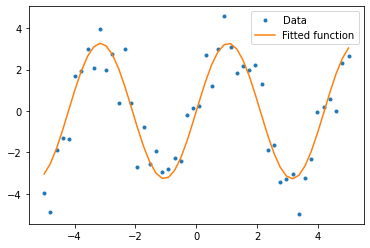

In [86]:
plt.plot(x_data, y_data, '.', label='Data')
y_fit = params[0] * np.sin(params[1]*x_data)
plt.plot(x_data, y_fit, label='Fitted function')
plt.legend();

### Exercise: Curve fitting of temperature data

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius)

In [98]:
temp_max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
temp_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

1. Plot these temperature extremes.
2. Define a function that can describe min and max temperatures. Hint: this function has to have a period of 1 year. Hint: include a time offset.
3. Fit this function to the data with scipy.optimize.curve_fit().
4. Plot the result. Is the fit reasonable? If not, why?
5. Is the time offset for min and max temperatures the same within the fit accuracy?

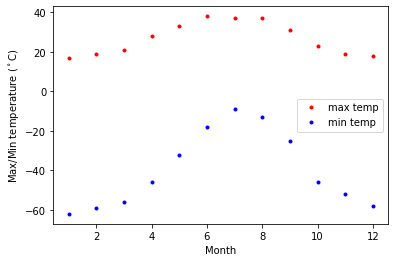

In [106]:
# 1) 
months = np.arange(1, 13)

plt.plot(months, temp_max, 'r.', label='max temp')
plt.plot(months, temp_min, 'b.', label='min temp')

plt.xlabel('Month')
plt.ylabel('Max/Min temperature ($^\circ$C)')
plt.legend();

In [107]:
# 2) Fitting it to a periodic function

def yearly_temps(times, avg, ampl, time_offset):
    f = avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max())
    return f

# 3)
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

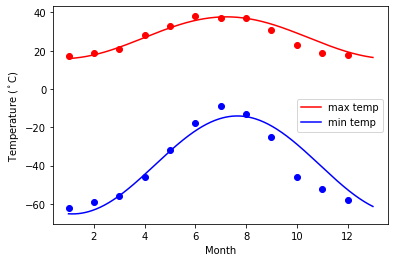

In [109]:
# 4)
days = np.linspace(1, 13, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-', label='max temp')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-', label='min temp')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend();

### Finding the minimum of a scalar function

Let's define the following function

In [111]:
def f(x):
    return x**2 + 10*np.sin(x)

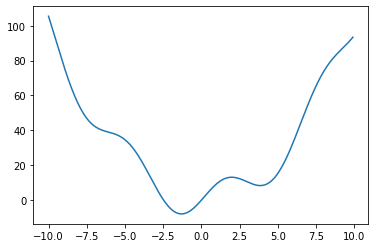

In [113]:
# plot
x = np.arange(-10, 10, .1)
plt.plot(x, f(x));

This function has a global minimum around -1.3 and a local minimum around 3.8.  

Searching for minimum can be done with `scipy.minimize()`, given a starting point x0. It returns the location of the minimum that is has found:

In [114]:
result = optimize.minimize(f, x0=0)
result

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

Note how it cost only 12 functions evaluations above to find a good value for the minimum.

**Global minimum**: A possible issue with this approach is that, if the function has local minima, the algorithm may find these local minima instead of the global minimum depending on the initial point x0:

In [115]:
res = optimize.minimize(f, x0=3, method='L-BFGS-B')
res.x

array([3.83746709])

If we don't know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization. To find the global minimum, we use `scipy.optimize.basinhopping()`. It combines a local optimizer with sampling of starting points:

In [120]:
optimize.basinhopping(f, 0)

                        fun: -7.945823375615284
 lowest_optimization_result:       fun: -7.945823375615284
 hess_inv: array([[0.08580376]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644002])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1020
                        nit: 100
                       njev: 510
                          x: array([-1.30644002])

**Constraints**: We can constrain the variable to the interval (0, 10) using the "bounds" argument

In [126]:
res = optimize.minimize(f, x0=0, bounds=((-5, 5), ))
res.x

array([-1.30644001])

### Finding the roots of a scalar function

To find a root, i.e. a point where f(x) = 0, of the function f above we can use `scipy.optimize.root()`:

In [127]:
root = optimize.root(f, x0=1) # our initial guess ix 1
root

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

Note that only one root is found. Inspecting the plot of f reveals that there is a second root around -2.5.  
We find the exact value of it by adjusting our initial guess.

## Statistics and random numbers: `scipy.stats`

The module `scipy.stats` contains statistical tools and probabilistic descriptions of random processes.  
Random number generators for various random process can be found in `numpy.random`.

### Distributions: histogram and probability density function

Given observations of a random process, their histogram is an estimator of the random process's PDF (probability density function):

In [128]:
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [129]:
histogram = np.histogram(samples, bins=bins, density=True)[0]
bins = .5 * (bins[1:] + bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

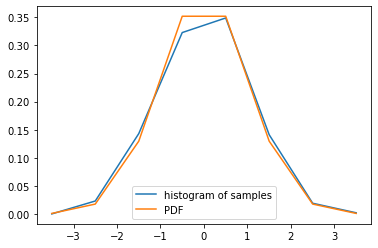

In [134]:
from scipy import stats
pdf = stats.norm.pdf(bins) # norm is a distribution object
plt.plot(bins, histogram, label='histogram of samples')
plt.plot(bins, pdf, label='PDF')
plt.legend();

<div class="alert alert-block alert-info">
<b>The distribution objects:</b> <br> 
    <em>scipy.stats.norm</em> is a distribution object: each distribution in <em>scipy.stats</em> is represented as an object. Here it's the normal distribution, and it comes with a PDF, a CDF and much more.
</div>

If we know that the random process belongs to a given family of random processes, such as normal processes, we can do a maximum-likelihood fit of the observations to estimate the parameters of the underlying distribution.  
Here we fit a normal process to the observed data:

In [135]:
loc, std = stats.norm.fit(samples)
loc, std

(0.017125939170096503, 1.0098671283176408)

### Mean, median and percentiles

The mean is an estimator of the center of the distribution:

In [152]:
np.mean(samples)

0.9871180921770272

The median is another estimator of the center. It is the value with half of the observations below, and half above:

In [153]:
np.median(samples)

0.6644902892684814

Unlike the mean, the median is not sensitive to the tails of the distribution. It is "robust".

The median is also the percentile 50, because 50\\% of the observation are below it:

In [154]:
stats.scoreatpercentile(samples, 50)

0.6644902892684814

Similarly, we can calculate the percentile 90:

In [155]:
stats.scoreatpercentile(samples, 90)

2.2774178259383038

The percentile is an estimator of the CDF: cumulative distribution function.

### Statistical tests

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a T-test to decide whether the means of two sets of observations are significantly different:

In [157]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-2.6138961581762343, pvalue=0.010228905919812275)

The resulting output is composed of:

* The T statistic value: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.
* The $p value$: the probability of both processes being identical. If it close to 1, the two process are almost certainly identical. The closer it is to zero the more likely it is that the processes have different means.

In [164]:
np.info(stats, maxwidth=100);

.. _statsrefmanual:

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions,
summary and frequency statistics, correlation functions and statistical
tests, masked statistics, kernel density estimation, quasi-Monte Carlo
functionality, and more.

Statistics is a very large area, and there are topics that are out of scope
for SciPy and are covered by other packages. Some of the most important ones
are:

- `statsmodels <https://www.statsmodels.org/stable/index.html>`__:
  regression, linear models, time series analysis, extensions to topics
  also covered by ``scipy.stats``.
- `Pandas <https://pandas.pydata.org/>`__: tabular data, time series
  functionality, interfaces to other statistical languages.
- `PyMC3 <https://docs.pymc.io/>`__: Bayesian statistical
  modeling, probabilistic machine learning.
- `scikit-learn <https://scikit-learn.org/>`__: classification, regression,
  model selection.
- `Seabor

## Numerical integration: `scipy.integrate`

### Function integrals

The most generic integration routine is `scipy.integrate.quad()`.  
To compute  $\int_0^{\pi / 2}\sin(t)\,dt$

In [168]:
from scipy import integrate

In [169]:
res, err = integrate.quad(np.sin, 0, np.pi/2)
np.allclose(res, 1)

True

In [170]:
np.allclose(err, 1-res)

True

Other integration schemes are available: 

In [171]:
np.info(integrate)

Integration and ODEs (:mod:`scipy.integrate`)

.. currentmodule:: scipy.integrate

Integrating functions, given function object

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   quad_vec      -- General purpose integration of vector-valued functions
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose N-D integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   IntegrationWarning -- Warning on issues during integration
   AccuracyWarning  -- Warning on issues during quadrature integration

Integrating functions, given fixed samples

.. autosummary::
   

## Fourier Transformation Functions

scipy includes a subpackage for Fourier transformation functions called `fftpack`. The transformations are Discrete Fourier Transformations (DFT). All transforms are applied using the Fast Fourier Transformation (FFT) algorithm.

To import the `fftpack` subpackage, use:

In [172]:
from scipy import fftpack

### Fast Fourier Transform

As an example, create a periodic function as  sum of three sine waves:

In [173]:
freq_samp = 100

# Time
t = np.linspace(0, 1, freq_samp*2, endpoint=False)

# Frequencies
f1, f2, f3 = 1, 5, 20

# Amplitudes
A1, A2, A3 = 3, 2, 1

x1 = A1 * np.sin(f1*2*np.pi*t)
x2 = A2*np.sin(f2*2*np.pi*t)
x3 = A3*np.sin(f3*2*np.pi*t)

#Sum of waves
x = x1+x2+x3

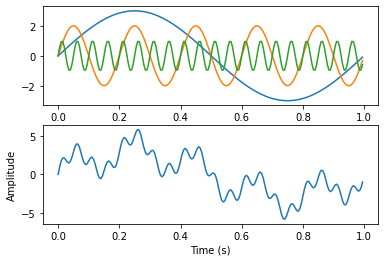

In [174]:
plt.subplot(2,1,1)
plt.plot(t,x1,t,x2,t,x3)
plt.subplot(2,1,2)
plt.plot(t,x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude');

Now to transform x from time domain to the frequency domain we apply the FFT to it.

In [175]:
A = fftpack.fft(x)
freq = fftpack.fftfreq(len(x)) * freq_samp * 2

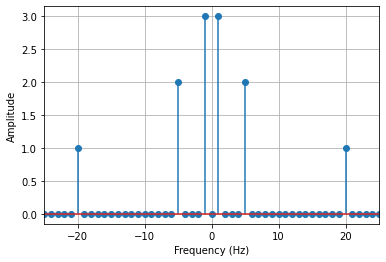

In [176]:
plt.stem(freq,np.abs(A)/freq_samp,use_line_collection=True)
plt.xlim(-25,25)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

So each impulse represents a sinus function and is mirrored.